Importing Libraries

In [79]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

plt.style.use('fivethirtyeight')

In [80]:
df = pd.read_csv('sat_gpa_attendance.csv')
df.head()

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SAT         84 non-null     int64  
 1   GPA         84 non-null     float64
 2   Attendance  84 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 2.1+ KB


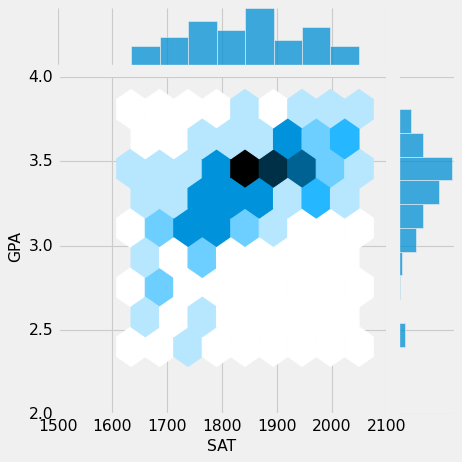

In [98]:
sns.jointplot(x = df['SAT'], y = df['GPA'], kind = 'hex')
plt.xlim(1500)
plt.ylim(2.0)

plt.savefig('Hex_plot_gpa_sat.jpeg')

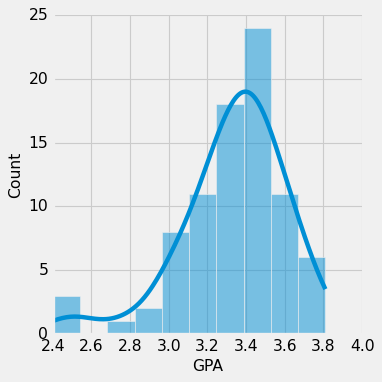

In [83]:
sns.displot(df['GPA'], kde = True,)

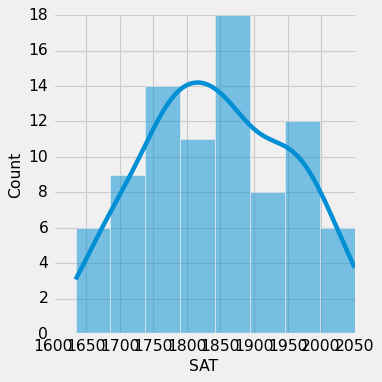

In [84]:
sns.displot(df['SAT'], kde = True,)

In [85]:
df_copy = df.copy()

In [86]:
df_copy['Attendance'] = df_copy['Attendance'].map({'Yes' : 1, 'No' : 0})
df_copy.head()

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0


Creating Linear Regression using sklearn and statsmodels

In [87]:
x = df_copy['SAT']
y = df_copy['GPA']
reg = LinearRegression()
reg.fit(x.values.reshape(-1,1),y)

LinearRegression()

In [88]:
reg.coef_

array([0.00165569])

In [89]:
reg.intercept_

0.275040299660279

In [90]:
df_absent = df_copy[df_copy['Attendance'] == 0][['SAT', 'GPA']]
df_present = df_copy[df_copy['Attendance'] == 1][['SAT', 'GPA']]

x2 = df_copy[['SAT','Attendance']]
y1 = df_copy[['GPA']]
x1 = sm.add_constant(x2)
result = sm.OLS(y1,x1).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Tue, 11 Apr 2023   Prob (F-statistic):           2.19e-15
Time:                        09:57:14   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Creating Linear Regression Model

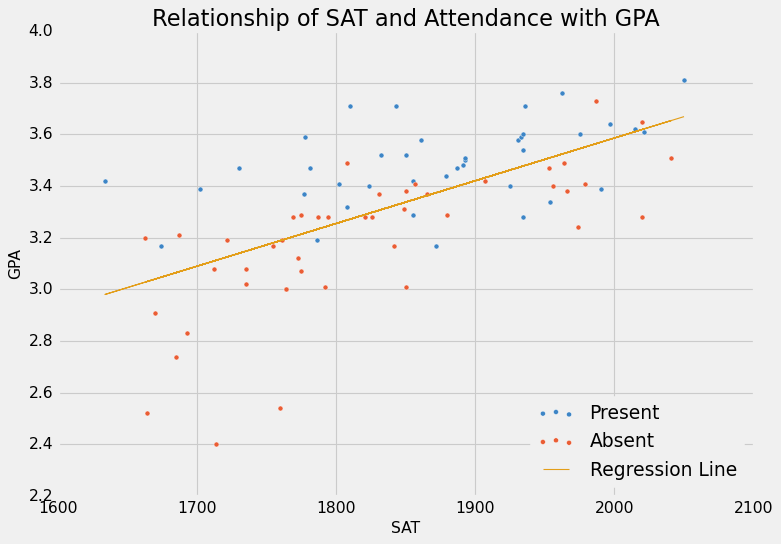

In [91]:
yhat = reg.coef_ * x.values.reshape(-1,1) + reg.intercept_
ypresent = result.params[0] + result.params[2] + df_copy['SAT'] * result.params[1]
yabsent = result.params[0] + df_copy['SAT'] * result.params[1]

plt.figure(figsize=(10,7))
sns.scatterplot(x = df_present['SAT'], y = df_present['GPA'], color = '#3d85c6', label = 'Present') #Present
sns.scatterplot(x = df_absent['SAT'], y = df_absent['GPA'], color = '#ea5d34', label = 'Absent') #Absent

plt.plot(x, yhat, c = '#e39e19', label = 'Regression Line', lw = 1)
#plt.plot(x, ypresent, c = '#3d85c6', label = 'Present', lw = 1) #Present
#plt.plot(x, yabsent, c = '#ea5d34', label = 'Absent', lw = 1) #Absent
plt.legend(loc = 'lower right')
plt.title('Relationship of SAT and Attendance with GPA')

plt.savefig('sat_gpa_attendance_1.jpeg', dpi=300)

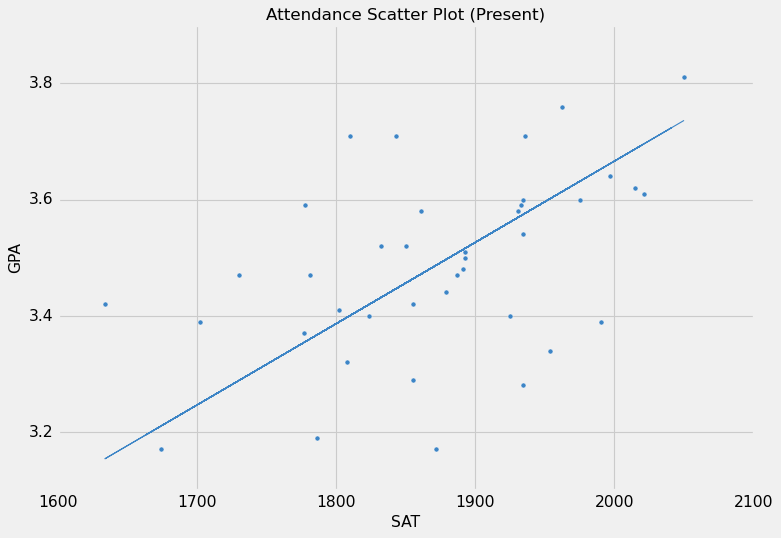

In [92]:
plt.figure(figsize=(10,7))
sns.scatterplot(x = df_present['SAT'], y = df_present['GPA'], color = '#3d85c6') #Present
plt.plot(x, ypresent, c = '#3d85c6', label = 'Present', lw = 1) #Present
plt.title('Attendance Scatter Plot (Present)', fontsize = 15)
plt.savefig('present.jpeg', dpi=300)

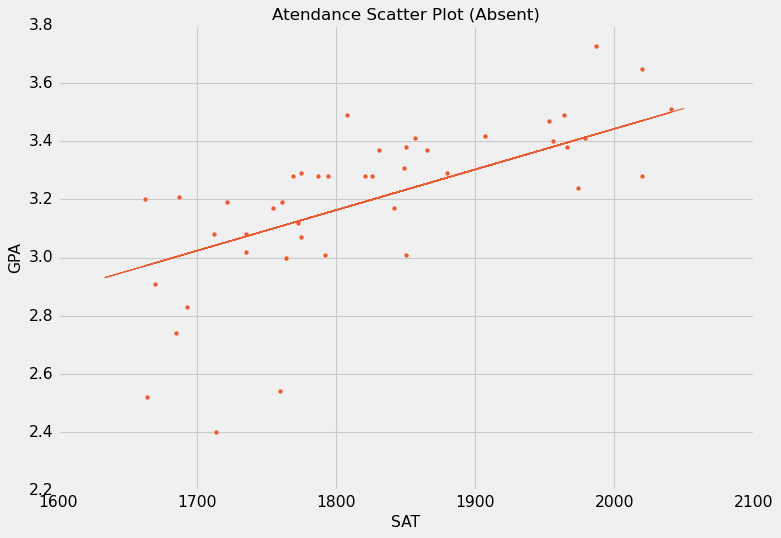

In [93]:
plt.figure(figsize=(10,7))
sns.scatterplot(x = df_absent['SAT'], y = df_absent['GPA'], color = '#ea5d34') #Absent
plt.plot(x, yabsent, c = '#ea5d34', label = 'Absent', lw = 1) #Absent
plt.title('Atendance Scatter Plot (Absent)', fontsize = 15)
plt.savefig('absent.jpeg', dpi=300)

Predicting Random GPA using statsmodels

In [94]:
#Predicting Random GPA

random_GPA = np.random.randint(1650,1955,10)
random_attendance = np.random.randint(0,2,10)
random_data = {'GPA' : random_GPA,
               'Attendance' : random_attendance}
random = pd.DataFrame(random_data)
random_data = sm.add_constant(random)
random_data

,const,GPA,Attendance
0,1.0,1771,0
1,1.0,1799,1
2,1.0,1920,1
3,1.0,1921,0
4,1.0,1937,1
5,1.0,1658,1
6,1.0,1780,1
7,1.0,1827,1
8,1.0,1863,1
9,1.0,1869,0


In [95]:
random['SAT Predictions'] = result.predict(random_data)
random

,GPA,Attendance,SAT Predictions
0,1771,0,3.122899
1,1799,1,3.384738
2,1920,1,3.554114
3,1921,0,3.332869
4,1937,1,3.577910
5,1658,1,3.187366
6,1780,1,3.358141
7,1827,1,3.423932
8,1863,1,3.474325
9,1869,0,3.260080


In [96]:
random.to_csv('predictions.csv', index = False)